In [2]:
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt 



import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import losses
from keras import optimizers
from keras import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
import numpy as np

import tensorflow as tf

import cv2
import os

from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools
#Heatmap https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python


Using TensorFlow backend.


In [3]:
with open('/Users/mattvalko/Documents/PHD/metadata.json',encoding="latin-1") as json_data:
    data = json.load(json_data)

In [4]:
#from pandas import json_normalize
info = pd.json_normalize(data["annotations"])

In [5]:
info

,category_id,id,image_id,region_id
0,15672,354106,354106,1
1,11524,818566,818566,1
2,11524,750704,750704,1
3,11467,722381,722381,1
4,15660,382783,382783,1
...,...,...,...,...
1030742,24148,856534,856534,3
1030743,5142,541440,541440,1
1030744,27240,927988,927988,1
1030745,269,242745,242745,2


In [6]:
label = pd.json_normalize(data["categories"])

In [7]:
files = pd.json_normalize(data[ "images"])

In [8]:
#get the folder to subset
files['folder']=files['file_name'].str[7:10]

In [9]:
fullDF = files[files["folder"].astype(int) < 11]

In [10]:
#Inner join all the data
merged=info.merge(fullDF,on='id',how="inner")


In [11]:
cnts=merged.groupby(['category_id'])['id'].count()

<AxesSubplot:xlabel='category_id'>

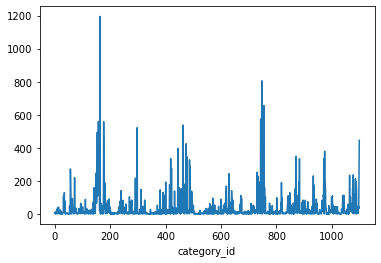

In [12]:
cnts.plot() 

In [13]:
catIDS=cnts[cnts > 500]#.index


In [14]:
catIDS

category_id
157     560
163    1195
176     560
297     523
463     539
743     576
747     806
755     656
Name: id, dtype: int64

<AxesSubplot:ylabel='category_id'>

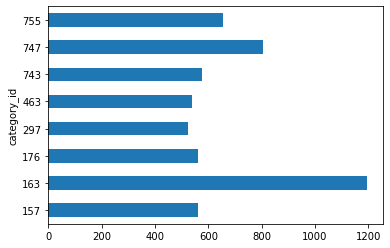

In [68]:
catIDS.plot.barh()


In [15]:
final = merged[merged['category_id'].isin(catIDS.index)]

In [18]:
#get the dimensioons of images
#after load, put all images into the max height, width 1000x1000
final.agg({'height' : ['min', 'max'], 'width' : ['min', 'max']})

,height,width
min,1000,667
max,1000,713


In [19]:
#Load images
imgDir=final['file_name'].str[7::]

In [20]:
imgDir=np.array(imgDir)

In [21]:
#h,w=1000
path='/Users/mattvalko/Documents/PHD/examdata/'
img=imgDir[0]
img_arr = cv2.imread(os.path.join(path, img))
resized_arr = cv2.resize(img_arr, (1000, 1000))


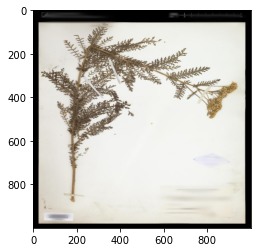

In [22]:
#Plot a plant
rgb_img = cv2.cvtColor(resized_arr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

In [23]:
label=np.array(final['category_id'])

In [24]:
u, y_train = np.unique(label, return_inverse=True)

In [25]:
classNum=len(catIDS)

y_train = keras.utils.to_categorical(y_train, classNum)

In [26]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
#Load all images
data = [] 
for i in range(0,len(imgDir)):
    img_arr = cv2.imread(os.path.join(path, imgDir[i]))
    resized_arr = cv2.resize(img_arr, (224, 224))
    data.append(resized_arr)

In [28]:
#scale everything to by 255

x_feat=np.array(data)

In [29]:



# Normalize the data
x_train = x_feat / 255


x_train.reshape(-1,224,224, 1)



array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.89411765],
         [0.9254902 ],
         [0.45882353],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.37647059],
         [0.90980392],
         [0.96470588]],

        [[0.98039216],
         [0.89411765],
         [0.93333333],
         ...,
         [0.96862745],
         [0.95294118],
         [0.93333333]]],


       [[[0.93333333],
         [0.89803922],
         [0.88

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_train,y_train,test_size=0.2,random_state=5)


In [31]:
print(classNum)
#https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classNum, activation="softmax"))

model.summary()

8
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)     

In [32]:
model.compile(loss='categorical_crossentropy',
 optimizer=RMSprop(),
 metrics=['accuracy'])

In [33]:

history = model.fit(xtrain,ytrain,epochs = 5 )


Epoch 1/5
4332/4332 [==============================] - 104s 24ms/step - loss: 0.9279 - accuracy: 0.7004
Epoch 2/5
4332/4332 [==============================] - 78s 18ms/step - loss: 0.4079 - accuracy: 0.8456
Epoch 3/5
4332/4332 [==============================] - 78s 18ms/step - loss: 0.3021 - accuracy: 0.8827
Epoch 4/5
4332/4332 [==============================] - 78s 18ms/step - loss: 0.2342 - accuracy: 0.9090
Epoch 5/5
4332/4332 [==============================] - 77s 18ms/step - loss: 0.1749 - accuracy: 0.9351


In [73]:
77+78+78+78+104

415

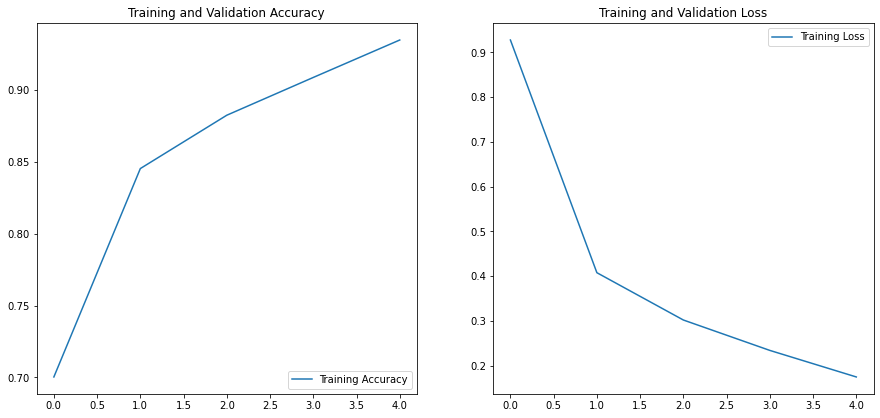

In [35]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']

epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
y_pred=model.predict_classes(xtest)
y_true=np.argmax(ytest,axis=1)
cm = metrics.confusion_matrix( y_true,y_pred)


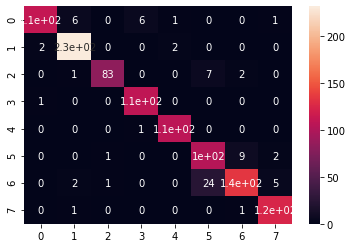

In [37]:
data=confusion_matrix(y_true, y_pred)
hm = sns.heatmap(data = data, annot=True) 

In [38]:
conf_mat_dict={}
labels = u
#for label_col in range(len(labels)):
#    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred==label_col, y_true=y_true==label_col)

for label_col in range(len(labels)):
    conf_mat_dict[labels[label_col]] =  skm.classification_report(y_pred=y_pred==label_col, y_true=y_true==label_col)


    
    
for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label 157:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       957
        True       0.97      0.89      0.93       126

    accuracy                           0.98      1083
   macro avg       0.98      0.94      0.96      1083
weighted avg       0.98      0.98      0.98      1083

Confusion matrix for label 163:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       847
        True       0.96      0.98      0.97       236

    accuracy                           0.99      1083
   macro avg       0.98      0.99      0.98      1083
weighted avg       0.99      0.99      0.99      1083

Confusion matrix for label 176:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       990
        True       0.98      0.89      0.93        93

    accuracy                           0.99      1083
   macro avg       0.98      0.9

In [39]:
#VGG 19 used https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=classNum, activation="softmax"))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 256)      

In [50]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [52]:
history = model.fit(xtrain, ytrain,
epochs=5,
verbose=1
,validation_data=(xtest, ytest))


Train on 4332 samples, validate on 1083 samples
Epoch 1/5
4332/4332 [==============================] - 13269s 3s/step - loss: 2.0377 - accuracy: 0.2214 - val_loss: 2.0390 - val_accuracy: 0.2179
Epoch 2/5
4332/4332 [==============================] - 11264s 3s/step - loss: 2.0384 - accuracy: 0.2214 - val_loss: 2.0385 - val_accuracy: 0.2179
Epoch 3/5
4332/4332 [==============================] - 6424s 1s/step - loss: 2.0377 - accuracy: 0.2214 - val_loss: 2.0398 - val_accuracy: 0.2179
Epoch 4/5
4332/4332 [==============================] - 3457s 798ms/step - loss: 2.0384 - accuracy: 0.2214 - val_loss: 2.0380 - val_accuracy: 0.2179
Epoch 5/5
4332/4332 [==============================] - 3388s 782ms/step - loss: 2.0367 - accuracy: 0.2214 - val_loss: 2.0383 - val_accuracy: 0.2179


In [74]:
13269+11264+6424+3457+3388

37802

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']

epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
y_pred=model.predict_classes(xtest)
y_true=np.argmax(ytest,axis=1)


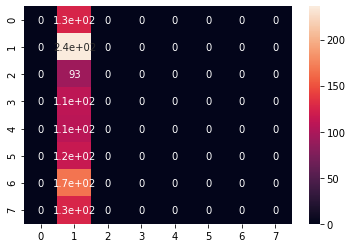

In [54]:
data=confusion_matrix(y_true, y_pred)
hm = sns.heatmap(data = data, annot=True) 

In [56]:


conf_mat_dict={}
labels = u
#for label_col in range(len(labels)):
#    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred==label_col, y_true=y_true==label_col)

for label_col in range(len(labels)):
    conf_mat_dict[labels[label_col]] =  skm.classification_report(y_pred=y_pred==label_col, y_true=y_true==label_col,zero_division=0)


    
    
for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label 157:
              precision    recall  f1-score   support

       False       0.88      1.00      0.94       957
        True       0.00      0.00      0.00       126

    accuracy                           0.88      1083
   macro avg       0.44      0.50      0.47      1083
weighted avg       0.78      0.88      0.83      1083

Confusion matrix for label 163:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       847
        True       0.22      1.00      0.36       236

    accuracy                           0.22      1083
   macro avg       0.11      0.50      0.18      1083
weighted avg       0.05      0.22      0.08      1083

Confusion matrix for label 176:
              precision    recall  f1-score   support

       False       0.91      1.00      0.96       990
        True       0.00      0.00      0.00        93

    accuracy                           0.91      1083
   macro avg       0.46      0.5

In [57]:
#https://analyticsindiamag.com/hands-on-guide-to-implementing-alexnet-with-keras-for-multi-class-image-classification/

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(classNum))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 56, 56, 96)        384       
_________________________________________________________________
activation_10 (Activation)   (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 256)      

In [58]:
opt = Adam(lr=0.001)
AlexNet.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [59]:
Alexnethistory = AlexNet.fit(xtrain, ytrain,
epochs=5,
verbose=1,
validation_data=(xtest, ytest))

Train on 4332 samples, validate on 1083 samples
Epoch 1/5
4332/4332 [==============================] - 651s 150ms/step - loss: 0.8272 - accuracy: 0.7830 - val_loss: 4.2707 - val_accuracy: 0.0997
Epoch 2/5
4332/4332 [==============================] - 648s 150ms/step - loss: 0.6147 - accuracy: 0.8599 - val_loss: 2.1598 - val_accuracy: 0.2715
Epoch 3/5
4332/4332 [==============================] - 585s 135ms/step - loss: 0.5315 - accuracy: 0.8783 - val_loss: 2.6495 - val_accuracy: 0.1699
Epoch 4/5
4332/4332 [==============================] - 744s 172ms/step - loss: 0.4655 - accuracy: 0.8940 - val_loss: 2.2054 - val_accuracy: 0.2539
Epoch 5/5
4332/4332 [==============================] - 570s 132ms/step - loss: 0.4250 - accuracy: 0.9024 - val_loss: 2.1096 - val_accuracy: 0.3213


In [75]:
651+648+585+744+744

3372

In [70]:
y_pred=AlexNet.predict_classes(xtest)
y_true=np.argmax(ytest,axis=1)

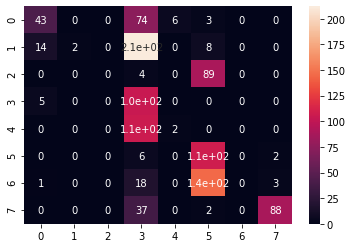

In [61]:

data=confusion_matrix(y_true, y_pred)
hm = sns.heatmap(data = data, annot=True) 

In [72]:

conf_mat_dict={}
labels = u
#for label_col in range(len(labels)):
#    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred==label_col, y_true=y_true==label_col)

for label_col in range(len(labels)):
    conf_mat_dict[labels[label_col]] =  skm.classification_report(y_pred=y_pred==label_col, y_true=y_true==label_col,zero_division=0)


    
    
for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label 157:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       957
        True       0.68      0.34      0.46       126

    accuracy                           0.90      1083
   macro avg       0.80      0.66      0.70      1083
weighted avg       0.89      0.90      0.89      1083

Confusion matrix for label 163:
              precision    recall  f1-score   support

       False       0.78      1.00      0.88       847
        True       1.00      0.01      0.02       236

    accuracy                           0.78      1083
   macro avg       0.89      0.50      0.45      1083
weighted avg       0.83      0.78      0.69      1083

Confusion matrix for label 176:
              precision    recall  f1-score   support

       False       0.91      1.00      0.96       990
        True       0.00      0.00      0.00        93

    accuracy                           0.91      1083
   macro avg       0.46      0.5

In [63]:
np.random.seed(1000)

#Instantiation
MattNet = Sequential()

#1st Convolutional Layer
MattNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(6,6), strides=(4,4), padding='same'))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))
MattNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
MattNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))
MattNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
MattNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))

#4th Convolutional Layer
MattNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))

#5th Convolutional Layer
MattNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))
MattNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
MattNet.add(Flatten())
# 1st Fully Connected Layer
MattNet.add(Dense(4096, input_shape=(32,32,3,)))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
MattNet.add(Dropout(0.4))

#2nd Fully Connected Layer
MattNet.add(Dense(4096))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))
#Add Dropout
MattNet.add(Dropout(0.4))

#3rd Fully Connected Layer
MattNet.add(Dense(1000))
MattNet.add(BatchNormalization())
MattNet.add(Activation('relu'))
#Add Dropout
MattNet.add(Dropout(0.4))

#Output Layer
MattNet.add(Dense(classNum))
MattNet.add(BatchNormalization())
MattNet.add(Activation('softmax'))

#Model Summary
MattNet.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 56, 56, 96)        10464     
_________________________________________________________________
batch_normalization_19 (Batc (None, 56, 56, 96)        384       
_________________________________________________________________
activation_19 (Activation)   (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 256)      

In [64]:
opt = Adam(lr=0.001)
MattNet.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


mattNethistory = MattNet.fit(xtrain, ytrain,
epochs=5,
verbose=1,
validation_data=(xtest, ytest))

Train on 4332 samples, validate on 1083 samples
Epoch 1/5
4332/4332 [==============================] - 611s 141ms/step - loss: 0.8187 - accuracy: 0.7890 - val_loss: 7.5650 - val_accuracy: 0.0859
Epoch 2/5
4332/4332 [==============================] - 547s 126ms/step - loss: 0.5870 - accuracy: 0.8693 - val_loss: 2.3823 - val_accuracy: 0.2761
Epoch 3/5
4332/4332 [==============================] - 491s 113ms/step - loss: 0.5057 - accuracy: 0.8823 - val_loss: 1.8058 - val_accuracy: 0.2502
Epoch 4/5
4332/4332 [==============================] - 487s 112ms/step - loss: 0.4509 - accuracy: 0.8929 - val_loss: 2.9217 - val_accuracy: 0.1440
Epoch 5/5
4332/4332 [==============================] - 476s 110ms/step - loss: 0.3949 - accuracy: 0.9164 - val_loss: 2.2219 - val_accuracy: 0.3712


In [76]:
 611+547+491+487+476

2612

In [65]:
y_pred=MattNet.predict_classes(xtest)
y_true=np.argmax(ytest,axis=1)

In [69]:

conf_mat_dict={}
labels = u
#for label_col in range(len(labels)):
#    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred==label_col, y_true=y_true==label_col)

for label_col in range(len(labels)):
    conf_mat_dict[labels[label_col]] =  skm.classification_report(y_pred=y_pred==label_col, y_true=y_true==label_col,zero_division=0)


    
    
for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label 157:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       957
        True       1.00      0.12      0.21       126

    accuracy                           0.90      1083
   macro avg       0.95      0.56      0.58      1083
weighted avg       0.91      0.90      0.86      1083

Confusion matrix for label 163:
              precision    recall  f1-score   support

       False       0.78      1.00      0.88       847
        True       0.00      0.00      0.00       236

    accuracy                           0.78      1083
   macro avg       0.39      0.50      0.44      1083
weighted avg       0.61      0.78      0.69      1083

Confusion matrix for label 176:
              precision    recall  f1-score   support

       False       0.99      0.93      0.96       990
        True       0.56      0.94      0.70        93

    accuracy                           0.93      1083
   macro avg       0.78      0.9

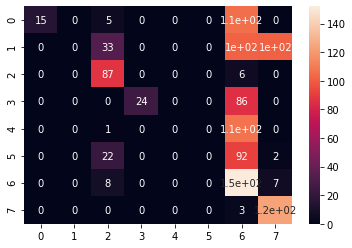

In [67]:
data=confusion_matrix(y_true, y_pred)
hm = sns.heatmap(data = data, annot=True) 
